#     Linear Regression

Let's begin with importing the required libraries:

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from matplotlib import cm

### 1. Univariate Linear Regression

* We have N observed values enumerated by $i$, which we will call $y_i$, at locations $x_i$
* The goal is to find the line that best fit the data
* In this case,
   $y=f(x)=\epsilon$ where $f(x)=w_0+w_1 x$
    and we aim to find coefficients $w_0$ and $w_1$.

* Consider the following data, which is scattered about a line

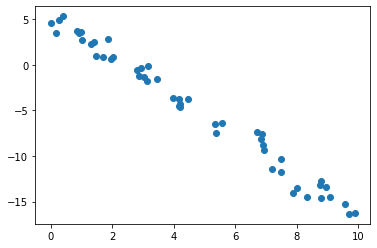

In [2]:
# Generating N dataset
rng = np.random.RandomState(1)
N=50
w0 = 5.3; # intercept of the line data is centered around
w1 = -2.2; # slope of the line data is centered around
x = 10 * rng.rand(N)
y = w0 + w1 * x + rng.randn(N)
plt.scatter(x, y);

* Now we can use LinearRegression to find the best fit,

* Model coefficients:
  w0: 5.301422914446793
  w1: -2.1727911896393044
 
* Mean square error: 0.8417457604929984


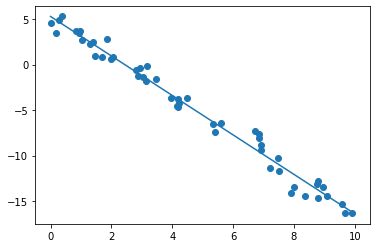

In [3]:
#Univariate Linear Regression
# Model fitting
model = LinearRegression(fit_intercept=True)
model.fit(x.reshape(-1,1), y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit.reshape(-1,1))
print("* Model coefficients:")
print("  w0:", model.intercept_)
print("  w1:", model.coef_[0])

# Plot
plt.scatter(x, y)
plt.plot(xfit, yfit);


# Mean Square Error (MSE)
MSE = np.sum((y-(w0+w1*x))**2)/N
print(' ')
print('* Mean square error:', MSE)

### 2. Multivariate Linear Regression
* When our input has $D$-dimensions, the linear regression will take the form  $f(X_1,X_2,...,X_D)=w_0+w_1X_1+w_2X_2+...+w_DX_D$.

* Below we demonstrate multivariate regression for an example with 2-dimensional inputs. 

* Model coefficients:
  w0:     0.5234305302616544
  w1: -1.4981378459001327
  w2: 1.9987417188643235

* Mean square error: 1.0173533384585118


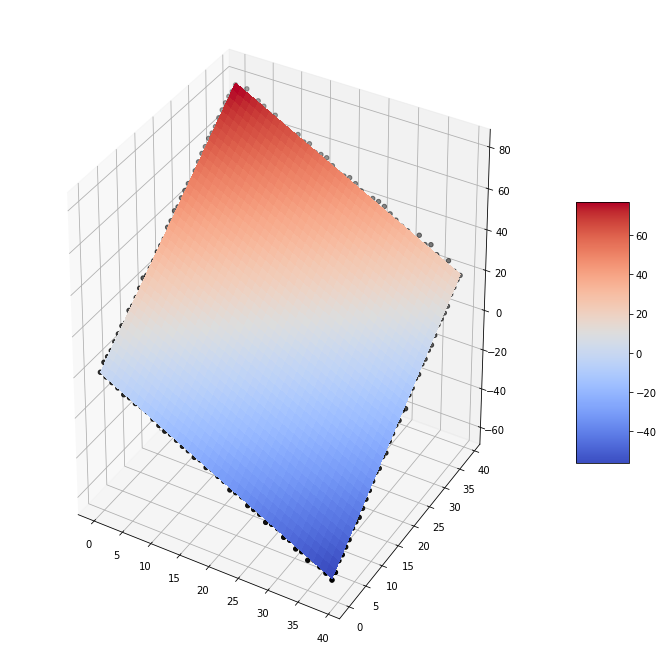

In [4]:
#Multivariate Linear Regression

# Data generation
model = LinearRegression(fit_intercept=True)
N=40
X1, X2 = np.meshgrid(np.arange(N), np.arange(N))
w0 = 0.5
w1 = -1.5
w2 = 2
y = w0 +w1 *X1+ w2 *X2  + rng.randn(N,N)
X=np.hstack((X1.reshape(-1,1),X2.reshape(-1,1)))

# Model fitting
model.fit(X, y.reshape(-1))
print("* Model coefficients:")
print("  w0:    ",model.intercept_)
print("  w1:",model.coef_[0])
print("  w2:",model.coef_[1])

# Mean Square Error (MSE)
MSE = np.sum((y-(w0 + w1*X1 + w2*X2))**2)/(N**2)
print('')
print('* Mean square error:', MSE)

# Plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],y,c='k')
surf = ax.plot_surface(X1,X2,model.predict(X).reshape(N,N), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=.4, aspect=5)
plt.show()

* Note that similar procedure can be performed for higher dimensional inputs:

In [5]:
# Data generation
rng = np.random.RandomState(1)
N=100
w0 = 0.5
wn = [1.5, -2., -1., 2.6] # where n=1,2,...,N
X = 10 * rng.rand(N, len(wn))
y = w0 + np.dot(X, wn) + 0.1 * rng.randn(N)

# Model fitting
model.fit(X, y)
print('* Model coefficients:')
print('  w0:',model.intercept_)
print('  wn:',model.coef_)

# Mean Square Error (MSE)
MSE = np.sum(((y-(w0 + np.dot(X, wn))))**2)/N
print(' ')
print('* Mean square error:', MSE)

* Model coefficients:
  w0: 0.5058901541347991
  wn: [ 1.49873298 -2.00012643 -0.99577333  2.59474474]
 
* Mean square error: 0.011456558415905305


### 3. Generalized Linear Regression: 
* Now we seek to find the regression of the form $y=\phi(X)+\epsilon$ where $\phi$ is denoting basis function.
* Each regression consists of M basis functions. We note $\phi_0(X)=1$.

#### 3.1 Polynomial Basis Functions
* In this case, $\phi_m(X)=X^m$ where $m=0,1,...,M$

Mean square error: 0.00016834915209859968


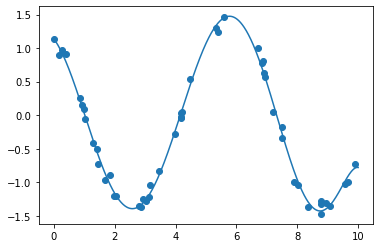

In [6]:
#Polynomial basis functions

poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())
rng = np.random.RandomState(1)
N=50
x = 10 * rng.rand(N)
y = 1.2*np.cos(x) - 0.75* np.sin(x) + 0.1 * rng.randn(N)
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

# Mean Square Error (MSE)
MSE = np.sum((y-(1.2 *np.cos(x) - 0.75*np.sin(x)))**2)/(N**2)
print('Mean square error:', MSE)

#### 3.2 Gaussian Basis Functions

* In this case, $\phi_m(X)=X^m$ where $m=0,1,...,M$

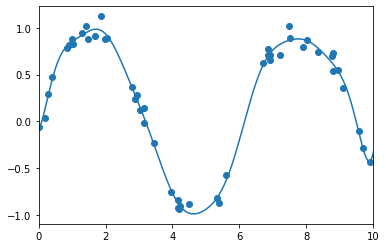

In [7]:
# First we define the Gaussian basis functions
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

    # Data generation
rng = np.random.RandomState(1)
N=50
x = 10 * rng.rand(N)
y = np.sin(x) + 0.1 * rng.randn(N)

# Now we use M Gausian basis functions to perform the regression 
M=15
gauss_model = make_pipeline(GaussianFeatures(M),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

### 4. Regularization
#### 4.0 Overfitting

* The introduction of basis functions into our linear regression makes the model much more flexible, but it also can lead to over-fitting.
* As an example, this can happen when we use too many basis functions to fit a regression model.

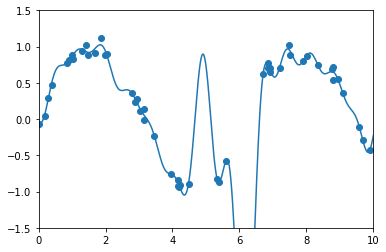

In [8]:
# Regularization
# Overfitting
M=30
model = make_pipeline(GaussianFeatures(M),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

* With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.

* Let's have a look at the coefficients of the basis functions.

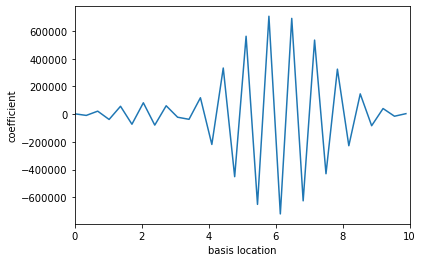

In [9]:
fig, ax = plt.subplots(1, sharex=True)
ax.plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
ax.set(xlabel='basis location',ylabel='coefficient',xlim=(0, 10))
plt.show()

* This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out. We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters. Such a penalty is known as regularization, and comes in several forms.

#### 4.1 Ridge Regression

* In Ridge regression, the model coefficients are obtained by penalizing the least square error by $P$ where
$P=\alpha \sum_{i=1}^N \bf w_i^2$

* The parameter $\alpha$ is a free parameter that controls the strength of the penalty.

* The  parameter $\alpha$ is essentially a knob controlling the complexity of the resulting model.
 * $\alpha \rightarrow 0$ , we recover the standard linear regression result
 * $\alpha \rightarrow \infty$ , all model responses will be suppressed

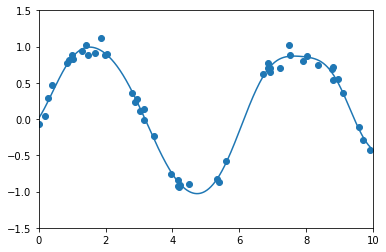

In [10]:
# Regularization
# Ridge Regression

model = make_pipeline(GaussianFeatures(M), Ridge(alpha=0.1))
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

* Now let's look at the coefficients,

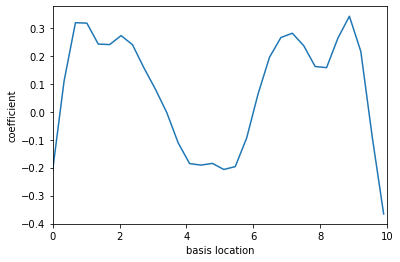

In [11]:
fig, ax = plt.subplots(1, sharex=True)
ax.plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
ax.set(xlabel='basis location',ylabel='coefficient',xlim=(0, 10))
plt.show()

* The $\alpha$  parameter tunes the strength of the penalty, and could be determined via cross-validation

In [12]:
# leave-one-out cross validation
clf = RidgeCV(alphas=[0.05,0.1,0.5],cv=None).fit(x[:, np.newaxis], y)
clf.alpha_

0.5

#### 4.2 LASSO Regression
* In LASSO regression, the model coefficients are obtained by penalizing the least square error by $P$ where
$P=\alpha \sum_{i=1}^N \lvert \bf w_i \rvert$

* The parameter $\alpha$ is a free parameter that controls the strength of the penalty.

* LASSO regression tends to favor sparse models where possible; i.e. it preferentially sets model coefficients to exactly zero.

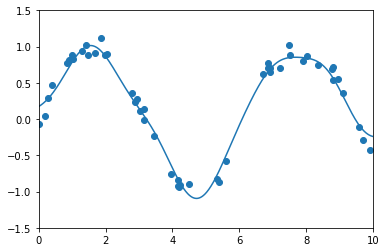

In [13]:
# Regularization
# LASSO Regression

model = make_pipeline(GaussianFeatures(M), Lasso(alpha=0.005))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

* Now let's look at the coefficients

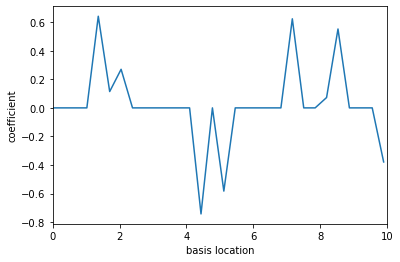

In [14]:
fig, ax = plt.subplots(1, sharex=True)
ax.plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
ax.set(xlabel='basis location',ylabel='coefficient',xlim=(0, 10))
plt.show()

* Similarly, the parameter $\alpha$ can be determined via cross-validation:

In [15]:
clf = LassoCV(cv=5, random_state=0).fit(x[:, np.newaxis], y) # 5-fold CV
clf.alpha_

0.11219109778581525